In [3]:
import numpy as np
import pandas as pd
import itertools
import math
import statsmodels.api as sm
import os
import matplotlib
import heapq
import warnings
import datetime
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [4]:
import re

def extract_date_from_excel_filename(filename):
    # Define a regular expression pattern to match the date in the filename
    date_pattern = r'\d{4}-\d{2}-\d{2}'
    
    # Use the re.search function to find the date in the filename
    match = re.search(date_pattern, filename)
    
    if match:
        # Extract the matched date and return it
        date_str = match.group()
        return date_str
    else:
        # If no date is found, return None or raise an exception, depending on your needs
        return None

# Example usage:
filename = "Item List KHOFFMAN 2023-10-02T15_43_14.xlsx"
date = extract_date_from_excel_filename(filename)
if date:
    print("Extracted date:", date)
else:
    print("No date found in the filename.")

Extracted date: 2023-10-02


In [5]:
# AMP100 - OH All foalder
path = "./data/inventory/Item Entry Ledger/Item Entry Ledger/"
files = os.listdir(path)
files_xlsx = [f for f in files if f.endswith('.xlsx')]
mydf_list = []
for file in files_xlsx:
    mydf = pd.read_excel(os.path.join(path, file),skiprows=2)
    mydf_list.append(mydf)


df_item = pd.concat(mydf_list)

In [6]:

df_item.head(3)

,Entry No.,Item No.,Posting Date,Entry Type,Source No.,Document No.,Description,Location Code,Quantity,Remaining Quantity
0,914363,LCHESIGLDPNK,2022-11-01,Sale,B428,S527760,JY1887 HEIDI DINING CHAIR PINK,VL,-4.0,0
1,914364,LCFOBAWACR26,2022-11-01,Sale,CSN800,S527761,JY1737 FOX 26 BARSTOOL CREAM,VL,-5.0,0
2,914365,LCFOBAWACR26,2022-11-01,Sale,C1800,S527762,JY1737 FOX 26 BARSTOOL CREAM,VL,-3.0,0


In [7]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285960 entries, 0 to 5375
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Entry No.           285960 non-null  int64  
 1   Item No.            285960 non-null  object 
 2   Posting Date        285960 non-null  object 
 3   Entry Type          285960 non-null  object 
 4   Source No.          281525 non-null  object 
 5   Document No.        285960 non-null  object 
 6   Description         285960 non-null  object 
 7   Location Code       285960 non-null  object 
 8   Quantity            285960 non-null  float64
 9   Remaining Quantity  285960 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 24.0+ MB


In [8]:
df_item['Posting Date'] = pd.to_datetime(df_item['Posting Date'])

In [9]:
df_item['Entry Type'].unique()

array(['Sale', 'Negative Adjmt.', 'Purchase', 'Assembly Consumption',
       'Assembly Output', 'Positive Adjmt.', 'Transfer'], dtype=object)

In [10]:
sales = df_item.loc[df_item['Entry Type'] == 'Sale']
sales['Quantity'] = abs(sales['Quantity'])
sales

,Entry No.,Item No.,Posting Date,Entry Type,Source No.,Document No.,Description,Location Code,Quantity,Remaining Quantity
0,914363,LCHESIGLDPNK,2022-11-01,Sale,B428,S527760,JY1887 HEIDI DINING CHAIR PINK,VL,4.0,0
1,914364,LCFOBAWACR26,2022-11-01,Sale,CSN800,S527761,JY1737 FOX 26 BARSTOOL CREAM,VL,5.0,0
2,914365,LCFOBAWACR26,2022-11-01,Sale,C1800,S527762,JY1737 FOX 26 BARSTOOL CREAM,VL,3.0,0
3,914366,LCBUCHWAGR,2022-11-01,Sale,A701,S527763,JY1829 BUTTERFLY CHAIR GREEN,VL,1.0,0
4,914367,LCBUCHWAGR,2022-11-01,Sale,A701,S527764,JY1829 BUTTERFLY CHAIR GREEN,VL,2.0,0
...,...,...,...,...,...,...,...,...,...,...
5371,1037725,LCRESIBLGR,2023-11-22,Sale,A701,S610914,MI-752 RENZO SIDE CHAIR LT GREY,VL,2.0,0
5372,1037726,LCRESIBLGR,2023-11-22,Sale,A701,S610915,MI-752 RENZO SIDE CHAIR LT GREY,VL,2.0,0
5373,1037727,LCBUBAWABL,2023-11-22,Sale,K56,S610916,JY1996 BUTTERFLY BARSTOOL BLA,VL,1.0,0
5374,1037729,LCBDBAESGR26,2023-11-22,Sale,H11732,S610918,4115-26 BRANDY BARSTOOL GREY,VL,1.0,0


In [11]:
print('Min date from dataset: %s' % sales['Posting Date'].min().date())
print('Max date from dataset: %s' % sales['Posting Date'].max().date())

Min date from dataset: 2021-01-04
Max date from dataset: 2023-12-05


In [12]:
sales.to_csv('sale.csv', index=False)

In [13]:
import pandas as pd

def filter_rows_by_value(dataframe, column_name, value):
    """
    Filter rows in a DataFrame based on a particular value in a specified column.

    Parameters:
    - dataframe: pandas DataFrame
        The input DataFrame containing the data.
    - column_name: str
        The name of the column to filter on.
    - value: any
        The value to filter rows on.

    Returns:
    - pandas DataFrame
        A new DataFrame containing only the rows that match the specified value in the specified column.
    """
    # Check if the specified column exists in the DataFrame
    if column_name not in dataframe.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return None

    # Filter rows based on the specified value in the specified column
    filtered_dataframe = dataframe[dataframe[column_name] == value]

    return filtered_dataframe

In [14]:
def plot_trend_item(item_df, column,item_number):
    filtered_data = filter_rows_by_value(item_df, column, item_number)
    plt.figure(figsize=(20, 8))
    plt.plot(sorted(filtered_data['Posting Date']), filtered_data['Quantity'],color='r', label='Sale Trend')
    plt.gcf().autofmt_xdate()
    plt.xlabel("Date") 
    plt.ylabel("Quantity Sales") 
    plt.title(f"Quanity sales by item No = {filtered_data.iloc[0]['Item No.']}")
    plt.legend() 

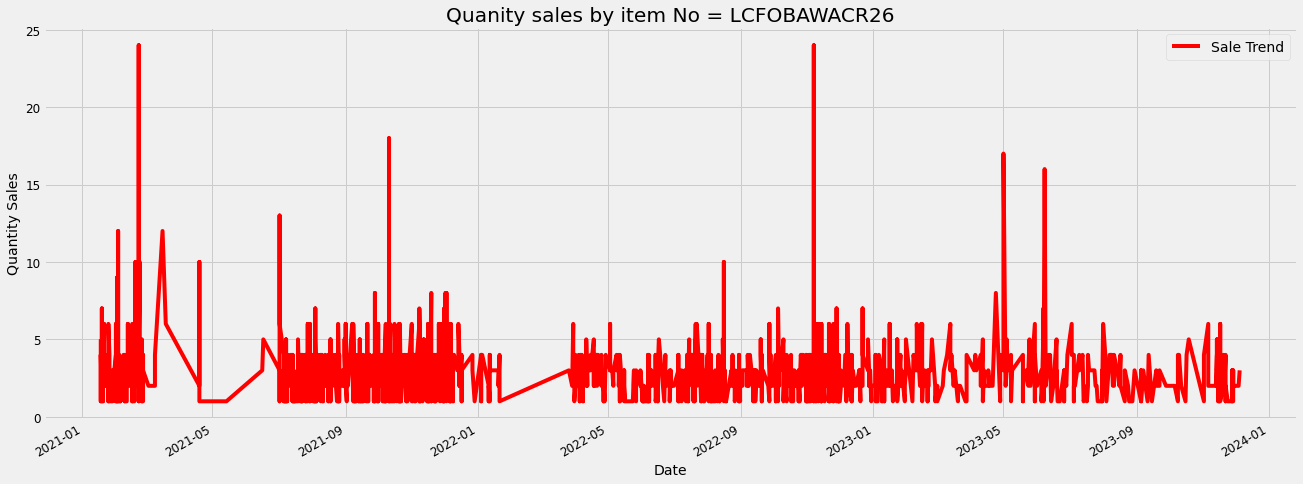

In [15]:
plot_trend_item(sales,'Item No.','LCFOBAWACR26')

**Total sales analysis by day**

In [16]:
def plot_trend_sales(sales):
    filtered_data = sales
    plt.figure(figsize=(20, 8))
    plt.plot(sorted(filtered_data['Posting Date']), filtered_data['Quantity'],color='g', label='Total Sale Trend')
    plt.gcf().autofmt_xdate()
    plt.xlabel("Date") 
    plt.ylabel("Quantity Sales") 
    plt.title("Total sales by day")
    plt.legend() 

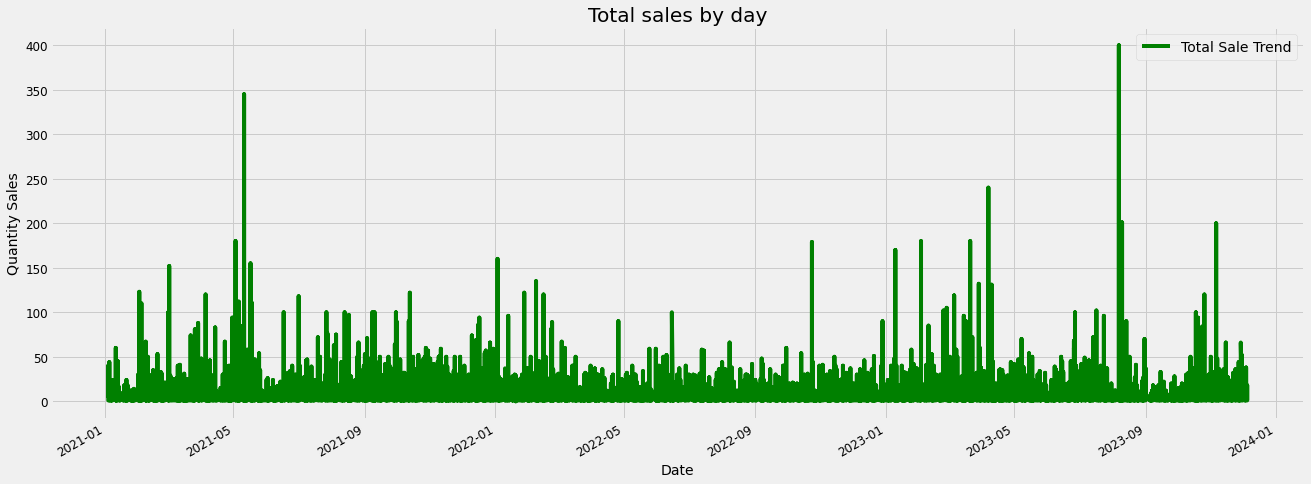

In [17]:
plot_trend_sales(sales)

In [18]:
## function forecast sale by item
def forcaste_sale_by_item(item_df, column,item_number):
    sale_forcast = filter_rows_by_value(item_df, column, item_number)
    sale_forcast = item_df[['Posting Date','Quantity']]

    #sale_forcast = sale_forcast.groupby("Posting Date")['Quantity'].sum().reset_index()
    sale_forcast.set_index("Posting Date", inplace = True)

    y = sale_forcast["Quantity"].resample('D').mean() #MS mean Month Star
    

    mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results = mod.fit()
    pred_uc = results.get_forecast(steps=100)
    pred_ci = pred_uc.conf_int()
    ax = y.plot(label='observed', figsize=(14, 7))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('Furniture Sales')
    #print(pred_ci)
    plt.legend()
    plt.show()  
    return pred_ci    

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01531D+00    |proj g|=  2.48530D-01


 This problem is unconstrained.



At iterate    5    f=  7.59891D-01    |proj g|=  1.39392D-01

At iterate   10    f=  7.44163D-01    |proj g|=  2.00637D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     25      1     0     0   1.555D-04   7.437D-01
  F =  0.74373552167430013     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


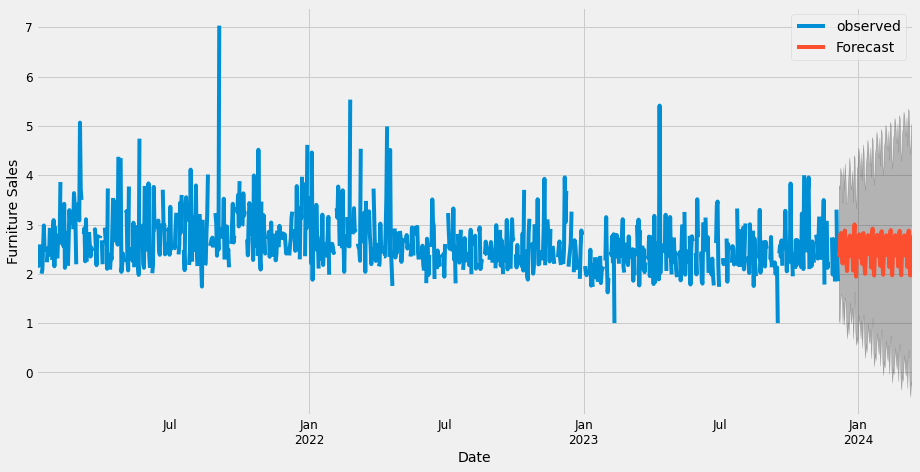

In [19]:
mean_sales = forcaste_sale_by_item(sales, 'Item No.', 'LCFOBAWACR26')

In [32]:
mean_sales['mean'] = mean_sales.mean(axis=1)

In [33]:
mean_sales[:7]

,lower Quantity,upper Quantity,mean
2023-12-06,1.078498,3.800549,2.293016
2023-12-07,1.010404,3.727470,2.245958
2023-12-08,1.434726,4.151741,2.862156
2023-12-09,1.599896,4.056586,2.885494
2023-12-10,1.550695,4.007385,2.852693
2023-12-11,0.981969,3.438659,2.140210
2023-12-12,1.438139,4.160939,2.866359


**stock exploration**

In [22]:
# AMP100 - OH All foalder
path = "./data/inventory/AMP100 - OH All/"
files = os.listdir(path)
files_xlsx = [f for f in files if f.endswith('.xlsx')]
mydf_list = []
for file in files_xlsx:
    date_ = extract_date_from_excel_filename(file)
    mydf = pd.read_excel(os.path.join(path, file))
    mydf['Date'] = date_
    mydf_list.append(mydf)


df_AMP100 = pd.concat(mydf_list)

In [24]:
df_AMP100.head(3)

,Cross-Reference No.,Item No.,Unique UPC,Cross-Reference No. 2,Variant Code,Unit of Measure,Item Description,Discontinue Bar Code,Description,Quantity on Hand,...,Qty on KY,Qty on UT,Qty on NH,Inventory on NJ,Inventory on UK,Inventory on CA2,Wayfair 846 Qty,Expected Receipt Date,846 Item No.,Date
0,LC0845BEBL,LC0845BEBL,NaN,ACTIVE,NaN,PCS,0845 CHATHAM BENCH W/ARMS BLAC,0,NaN,95,...,0,0,0,0,0,0,93,NaT,NaN,2023-12-05
1,LC0845BEBR,LC0845BEBR,NaN,ACTIVE,NaN,PCS,0845 CHATHAM BENCH W/ARMS BROW,0,NaN,0,...,0,0,0,0,0,0,0,NaT,NaN,2023-12-05
2,LC0845BEGR,LC0845BEGR,NaN,ACTIVE,NaN,PCS,0845 CHATHAM BENCH W/ARMS GRAY,0,NaN,0,...,0,0,0,0,0,0,0,NaT,NaN,2023-12-05


In [25]:
df_AMP100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98523 entries, 0 to 4436
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Cross-Reference No.    98523 non-null  object        
 1   Item No.               98523 non-null  object        
 2   Unique UPC             888 non-null    object        
 3   Cross-Reference No. 2  92741 non-null  object        
 4   Variant Code           0 non-null      float64       
 5   Unit of Measure        97806 non-null  object        
 6   Item Description       98523 non-null  object        
 7   Discontinue Bar Code   98523 non-null  int64         
 8   Description            0 non-null      float64       
 9   Quantity on Hand       98523 non-null  int64         
 10  Qty. on Purch. Order   98523 non-null  int64         
 11  Qty. on Sales Order    98523 non-null  int64         
 12  On Hand Available      98523 non-null  int64         
 13  Qt

In [111]:
def clean_number(df, my_column):
    df[my_column] = df[my_column].str.replace('==', '')



clean_number(df_AMP100,'Item No.')

In [112]:
df_AMP100['Date'] = pd.to_datetime(df_AMP100['Date'])

print('Min date from dataset: %s' % df_AMP100['Date'].min().date())
print('Max date from dataset: %s' % df_AMP100['Date'].max().date())

Min date from dataset: 2023-10-02
Max date from dataset: 2023-12-05


In [113]:
df_AMP100.to_csv('inventory.csv', index=False)

In [114]:
def plot_trend_item_stock(item_df, column,item_number):
    filtered_data = filter_rows_by_value(item_df, column, item_number)
    plt.figure(figsize=(20, 8))
    plt.plot(sorted(filtered_data['Date']), filtered_data['Quantity on Hand'],color='r', label='Stock Trend')
    plt.gcf().autofmt_xdate()
    plt.xlabel("Date") 
    plt.ylabel("Quantity On Hand Available") 
    plt.title(f"Quantity On Hand Available by item No = {filtered_data.iloc[0]['Item No.']}")
    plt.legend() 

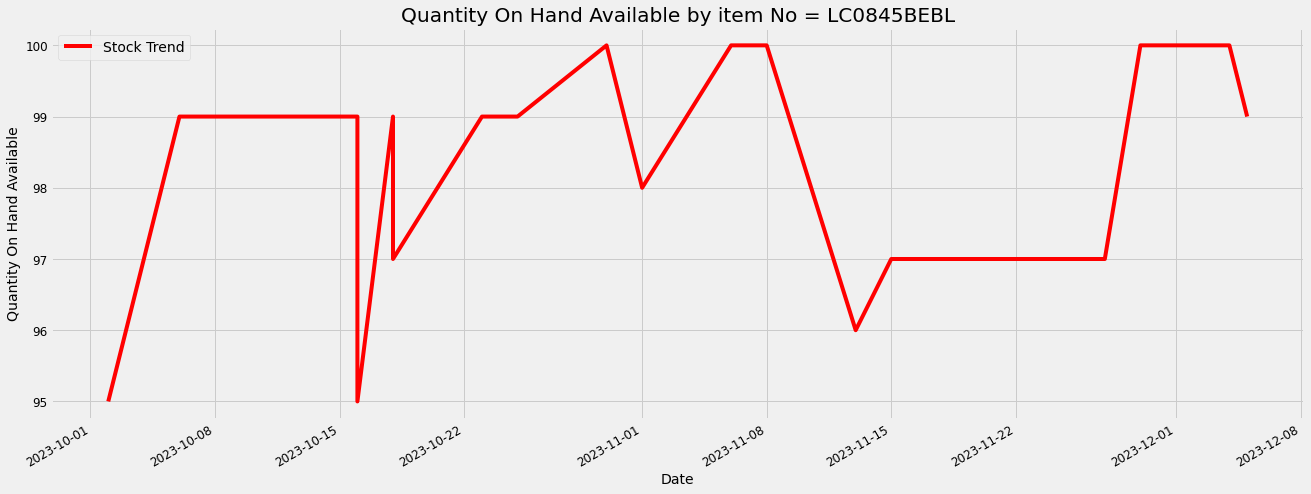

In [115]:
plot_trend_item_stock(df_AMP100,'Item No.','LC0845BEBL')

In [116]:
data = df_AMP100[['Item No.', 'Quantity on Hand']]

In [117]:
data

,Item No.,Quantity on Hand
0,LC0845BEBL,95
1,LC0845BEBR,0
2,LC0845BEGR,0
3,LC0845BEPU,0
4,LC0845BERE,0
...,...,...
4432,UKVIBABRWA26,0
4433,UKVIBABRWA30,1
4434,UKVIBAGRBL30,0
4435,UKVIBAGRWA26,0


In [148]:
filtered_data = filter_rows_by_value(data, 'Item No.', 'LCFOBAWACR26')
filtered_data

,Item No.,Quantity on Hand
1460,LCFOBAWACR26,602
1447,LCFOBAWACR26,648
1443,LCFOBAWACR26,658
1443,LCFOBAWACR26,650
3815,LCFOBAWACR26,649
1447,LCFOBAWACR26,694
1460,LCFOBAWACR26,536
1234,LCFOBAWACR26,658
1235,LCFOBAWACR26,658
1460,LCFOBAWACR26,544


In [121]:
filtered_data.iloc[-1]['Quantity on Hand']

602

In [122]:
mean_sales["sum"] = mean_sales['mean'].cumsum().round()

In [123]:
mean_sales

,lower Quantity,upper Quantity,mean,sum
2023-12-06,1.078498,3.800549,2.439523,2.0
2023-12-07,1.010404,3.727470,2.368937,5.0
2023-12-08,1.434726,4.151741,2.793234,8.0
2023-12-09,1.599896,4.056586,2.828241,10.0
2023-12-10,1.550695,4.007385,2.779040,13.0
...,...,...,...,...
2024-03-10,-0.492864,4.426247,1.966692,240.0
2024-03-11,-0.186531,4.993567,2.403518,242.0
2024-03-12,-0.301002,5.070087,2.384542,244.0
2024-03-13,0.042210,5.413229,2.727720,247.0


In [124]:
item_out_stock = filter_rows_by_value(mean_sales, 'sum', filtered_data.iloc[-1]['Quantity on Hand'])

In [125]:
## print time when the item will go out of stock in the week
#Date_out_stock = item_out_stock.index[0]
#print(Date_out_stock.date())

In [130]:
def data_item_out_stock(sales,df_stock, item):
    data_stock = df_stock[['Item No.', 'Quantity on Hand']]
    filtered_data = filter_rows_by_value(data_stock, 'Item No.', item)
    sales["sum"] = sales['mean'].cumsum().round()
    total_quantity_item1 = filtered_data.iloc[-1]['Quantity on Hand']
    if total_quantity_item1 <= 0: 
        return f"The item {item} is out of stock"
    else:
        total_quantity_item= heapq.nsmallest(1, list(sales["sum"]), key=lambda x: abs(x-total_quantity_item1))[0]
        if total_quantity_item<max(sales["sum"]):
            item_out_stock = filter_rows_by_value(sales, 'sum', total_quantity_item)
        
            ## print time when the item will go out of stock in the week
            Date_out_stock = item_out_stock.index[0]
            return Date_out_stock.date()
        else:
            return "Item wont be out of stock during the week"
    
    


In [131]:
result = data_item_out_stock(mean_sales,data, 'LCACBABRK30')
result

            lower Quantity  upper Quantity      mean   sum
2023-12-09        1.599896        4.056586  2.828241  10.0


datetime.date(2023, 12, 9)

**Predict all items that will be out of stock during the week**

In [138]:
list_item = []
for item in data['Item No.'].unique():
    result = data_item_out_stock(mean_sales[:7],data, item)
    if type(result)==datetime.date:
        list_item.append([item,result])
        #print(list_item)

            lower Quantity  upper Quantity      mean  sum
2023-12-07        1.010404         3.72747  2.368937  5.0
            lower Quantity  upper Quantity      mean  sum
2023-12-06        1.078498        3.800549  2.439523  2.0
            lower Quantity  upper Quantity      mean  sum
2023-12-06        1.078498        3.800549  2.439523  2.0
            lower Quantity  upper Quantity      mean  sum
2023-12-06        1.078498        3.800549  2.439523  2.0
            lower Quantity  upper Quantity      mean  sum
2023-12-07        1.010404         3.72747  2.368937  5.0
            lower Quantity  upper Quantity      mean  sum
2023-12-06        1.078498        3.800549  2.439523  2.0
            lower Quantity  upper Quantity      mean  sum
2023-12-06        1.078498        3.800549  2.439523  2.0
            lower Quantity  upper Quantity      mean  sum
2023-12-06        1.078498        3.800549  2.439523  2.0
            lower Quantity  upper Quantity      mean  sum
2023-12-07    

In [139]:
result = {}
for l in list_item:
    item = l[0]
    date_ = l[1]
    if date_.strftime("%Y-%m-%d") in result:
        result[date_.strftime("%Y-%m-%d")].append(item)
    else:
        result[date_.strftime("%Y-%m-%d")] = [item]


In [140]:
#!pip install prettytable

In [141]:
from prettytable import PrettyTable

# Your dictionary with different lengths for values


# Find the maximum length among all values
max_length = max(len(v) if isinstance(v, list) else 1 for v in result.values())

# Pad the lists with empty strings to make them of equal length
for key, value in result.items():
    if isinstance(value, list):
        result[key] += [''] * (max_length - len(value))

# Create a PrettyTable
table = PrettyTable(result.keys())

# Add rows to the table
for i in range(max_length):
    table.add_row([result[key][i] for key in result.keys()])

# Display the table
print(table)

+----------------+------------------+---------------+-----------------+-----------------+----------------+
|   2023-12-07   |    2023-12-06    |   2023-12-09  |    2023-12-08   |    2023-12-10   |   2023-12-11   |
+----------------+------------------+---------------+-----------------+-----------------+----------------+
|  LC10601ATBL   |   LC10601VICO    |   LC847SIGR   |  LCAABABRNBG30  |  LCAABABRNTP30  |    LCAGCNWA    |
|  LC4044BARE30  |   LC10602ATBL    |   LC847SIPU   |   LCAABAWACR26  |    LCAODRROAK   |   LCAOBAWACR   |
|   LC847SIBL    |   LC3107SIASH    |  LCACBABRK30  |    LCAFBTBL26   |    LCATCHWDLT   |  LCBUBAWAGRAY  |
|   LCADBAGRBL   |  LC5026OTSQLINA  |  LCAXBAWABR26 |     LCAGCOWA    |   LCAYBABLGR26  | LCCEBABRNBG30  |
|   LCADCHWABL   |    LC8099SIBL    |   LCAZSIWACH  |     LCAHLOWH    |   LCBABAWACR30  | LCCEBABRNTP30  |
|    LCAF3BRN    |    LC8443GRAY    |   LCBABABLGR  |   LCAJDIGRTOP   |  LCBRBDGRQNBX1  |   LCCODRBAL    |
|   LCAF3DVGRY   |   LCAABAWABR26   |

In [143]:
def all_item_out_of_stock_day(mean_sales,df_item):
    result = {}
    for item in df_item['Item No.'].unique():
        date_ = data_item_out_stock(mean_sales[:7],df_item, item)
        if type(date_)==datetime.date:
            #list_item.append([item,result])
            if date_.strftime("%Y-%m-%d") in result:
                result[date_.strftime("%Y-%m-%d")].append(item)
            else:
                result[date_.strftime("%Y-%m-%d")] = [item]
    
    # Find the maximum length among all values
    max_length = max(len(v) if isinstance(v, list) else 1 for v in result.values())

    # Pad the lists with empty strings to make them of equal length
    for key, value in result.items():
        if isinstance(value, list):
            result[key] += [''] * (max_length - len(value))

    # Create a PrettyTable
    table = PrettyTable(result.keys())

    # Add rows to the table
    for i in range(max_length):
        table.add_row([result[key][i] for key in result.keys()])

    # Display the table
    return table

In [144]:
table_item = all_item_out_of_stock_day(mean_sales,data)

            lower Quantity  upper Quantity      mean  sum
2023-12-07        1.010404         3.72747  2.368937  5.0
            lower Quantity  upper Quantity      mean  sum
2023-12-06        1.078498        3.800549  2.439523  2.0
            lower Quantity  upper Quantity      mean  sum
2023-12-06        1.078498        3.800549  2.439523  2.0
            lower Quantity  upper Quantity      mean  sum
2023-12-06        1.078498        3.800549  2.439523  2.0
            lower Quantity  upper Quantity      mean  sum
2023-12-07        1.010404         3.72747  2.368937  5.0
            lower Quantity  upper Quantity      mean  sum
2023-12-06        1.078498        3.800549  2.439523  2.0
            lower Quantity  upper Quantity      mean  sum
2023-12-06        1.078498        3.800549  2.439523  2.0
            lower Quantity  upper Quantity      mean  sum
2023-12-06        1.078498        3.800549  2.439523  2.0
            lower Quantity  upper Quantity      mean  sum
2023-12-07    

In [147]:
table_item

2023-12-07,2023-12-06,2023-12-09,2023-12-08,2023-12-10,2023-12-11
LC10601ATBL,LC10601VICO,LC847SIGR,LCAABABRNBG30,LCAABABRNTP30,LCAGCNWA
LC4044BARE30,LC10602ATBL,LC847SIPU,LCAABAWACR26,LCAODRROAK,LCAOBAWACR
LC847SIBL,LC3107SIASH,LCACBABRK30,LCAFBTBL26,LCATCHWDLT,LCBUBAWAGRAY
LCADBAGRBL,LC5026OTSQLINA,LCAXBAWABR26,LCAGCOWA,LCAYBABLGR26,LCCEBABRNBG30
LCADCHWABL,LC8099SIBL,LCAZSIWACH,LCAHLOWH,LCBABAWACR30,LCCEBABRNTP30
LCAF3BRN,LC8443GRAY,LCBABABLGR,LCAJDIGRTOP,LCBRBDGRQNBX1,LCCODRBAL
LCAF3DVGRY,LCAABAWABR26,LCBACHBR,LCANDIBLBASE,LCBRBDGRQNBX2,LCCPDITOCLEAR
LCAJBDGRKGBX1,LCAB3NAT,LCBRDEGR,LCANSOBLU,LCBRBDGRQNBX3,LCCRBDOAKGBX1
LCAJBDGRKGBX2,LCACDIGRBASE,LCCHCHWACH,LCANSODKGRY,LCBRBDGRQNBX4,LCCRBDOAKGBX2
LCAJBDGRKGBX3,LCAHBDDGQNBX1,LCCOBABLGR26,LCANSOGRY,LCBRDRGR,LCCRBDOAQNBX1
